# Logistic Regression for Fun: Phishing Detection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import string
import collections as ct

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import words
from nltk.corpus import wordnet

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('phishing_site_urls.csv')

# df = pd.read_pickle('phishing_df.pkl')

df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


## High Level Exploration and Cleaning of the Data Frame

In [ ]:
- here's a url that has some data cleaning code
    - https://www.kaggle.com/code/ashishkumarbehera/phishing-site-prediction

In [3]:
len(df)

549346

- (below) let's create a column where `1` is a URL identified as phishing, and `0` is a "good" url.

In [4]:
df['phishing'] = (df.Label == 'bad').astype(int)

In [5]:
df[::10000]

,URL,Label,phishing
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,1
10000,paypal.com.us-cgi-bin-webscr-cmd.login.5885d80...,bad,1
20000,www.cpiano.com/css/login.htm?us.battle.net/log...,bad,1
30000,buykey.byethost13.com/,bad,1
40000,www.bjcurio.com/js/index.htm?ref=jgmmabgus.bat...,bad,1
50000,www.cyberhorse.net.au/csl/,good,0
60000,www.cse.iitk.ac.in/users/amit/index.html,good,0
70000,ecnow.com/Internet_Marketing.htm,good,0
80000,www.fgroupsoft.com/Traysafe/,good,0
90000,www.xlcus.co.uk/software/acorn/index.shtml#pac...,good,0


In [6]:
df.drop('Label', axis = 1)

,URL,phishing
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,1
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,1
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,1
3,mail.printakid.com/www.online.americanexpress....,1
4,thewhiskeydregs.com/wp-content/themes/widescre...,1
...,...,...
549341,23.227.196.215/,1
549342,apple-checker.org/,1
549343,apple-iclods.org/,1
549344,apple-uptoday.org/,1


- (below) let's look at the "good" urls and see if we need to do any data cleaning

In [7]:
df[df['phishing'] == 0].iloc[::10000]

,URL,Label,phishing
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,0
57904,www.marinesurveyor.com/ogden/,good,0
67904,tools.ietf.org/html/rfc2010,good,0
77904,infohost.nmt.edu/tcc/help/pubs/lang.html,good,0
87904,www.voicecallcentral.com/index.htm,good,0
140671,adirondackexplorer.org/,good,0
150671,blog.revolutionsoccer.net/?p=7383,good,0
160671,companydatabase.org/c/retail-lumber-other-buil...,good,0
170671,en.wikipedia.org/wiki/2010_Portland_Timbers_se...,good,0
180671,en.wikipedia.org/wiki/Sole_proprietorship,good,0


- (below) we suspect there is a data quality issue.  Here is a URL that looks ok.

In [8]:
df["URL"].iloc[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [9]:
df["URL"].str.len().iloc[0]

225

In [10]:
normal_chars = string.printable

sum(v for k, v in ct.Counter(df["URL"].iloc[0]).items() if k in normal_chars)

225

- (below) here is a URL that we are concerned about.

In [11]:
df["URL"].iloc[18232]

"www\x0eeira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùu\x03Ë\nÓ\x176(rTÃ\x06u\x0f\x8f\x7fæ\x82\x0c\x99=g\x810¾\x96÷mÖi\x12Ó-;\x9bXZ\\%êýü\x05Éfn&\x87\\°%7õÙ:¹u\x96\x0f\x161ÌÑêFÄòW<\x18\x80$cï\x86¦t[\x910ò\x9f>Þj\x93®ÆeV2\x92à\x1bpù-íàÇ$E¤ZëÈ²ú\x16SÌ¶\tp\x1fáSò°i°vþ[«³»]¹\rjlÛW¿\x95\x9b\x8a]ø¾µj¿;\x08·ªo!\x94ÒPì\xa0·Ê\x8bïH§#'\x823\x1bø@CÄR\x02õ²çÇ\x17\x17Ý®\x16ö\x1d\x7fQBÇÆg`Èå\x85Zéê\xa0D\x1cîÂm\x9e®ÎÝQó*x;9?\x0fÁ\x19\x81Òâ\x88\x99bùt\x1bÖ\x07\x96Ù®mÞ\x80N\x94\x97P¯°^M\x8eQ\n(\x1f-\x04\x06§;¬ÔAèUè\x99é\\\x10¨ø\x95íÌ\x88dB\\\x01\x8b\x12[q½=ÿVuÃ\x01»\x07râæH\x1bä\x8dô/µ}\x85»7!2=´ÂÏ4¿ª¡j91\x04\x86]"

In [12]:
df["URL"].str.len().iloc[18234]

33

- (below) a function for identifying which rows contain these bad URLs.

In [13]:
def non_printable_indices(col):
    """
    Returns a vector of indices for elements that contain non-printable characters.
    """
    indices = []
    for i, s in col.items():
        if any(c not in string.printable for c in s):
            indices.append(i)
    return indices

In [14]:
bad_URL_rows = non_printable_indices(df["URL"])

In [15]:
bad_df = df.iloc[bad_URL_rows]

In [30]:
bad_df.head()

,URL,Label,phishing
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,0
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,0
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,0
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,0
18235,è kvüDâQÎé4¼Ò©,bad,1


- (below) the weird urls are a little less represented in the "non-phishing" category, but they represent a small portion of total rows so we're going to remove them.

In [16]:
(bad_df['phishing'] == 1).sum()/(bad_df['phishing'] == 0).sum()

0.13279132791327913

In [17]:
(df['phishing'] == 1).sum()/(df['phishing'] == 0).sum()

0.3980973419796195

- (below) the actual removal...

In [18]:
df = df.drop(bad_URL_rows)

<AxesSubplot:xlabel='phishing', ylabel='count'>

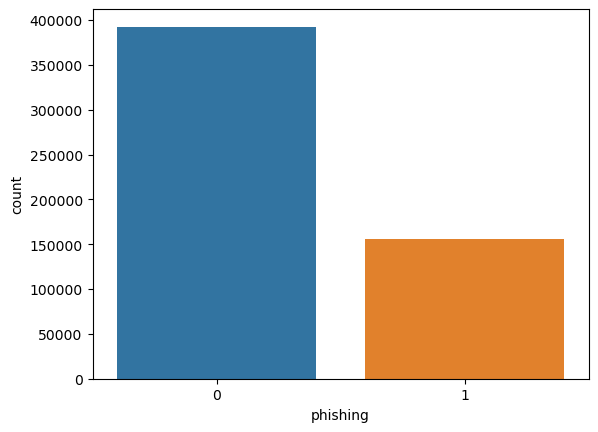

In [19]:
sns.countplot(x="phishing",data=df)

## Feature Engineering
- (below) this is our first feature! a length count of characters.

In [20]:
df['url_length'] = df['URL'].str.len()

In [21]:
df.head()

,URL,Label,phishing,url_length
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,1,225
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,1,81
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,1,177
3,mail.printakid.com/www.online.americanexpress....,bad,1,60
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,1,116


- (below) create a tokenizer object that can be used to split text into tokens based on a regular expression pattern.

In [22]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [23]:
tokenizer.tokenize(df.URL[0]) 

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

- (below) lets apply the tokenizer to every record in df.URL 
   - NOTE:  a lambda function is a small anonymous function that can be defined inline without a name. It's a shorthand way to define a function that takes arguments, performs an operation on them, and returns a value, all in a single line of code.
   - basic syntac is `add = lambda x, y: x + y`
   - `add(3, 5)` will return 8

In [24]:
df['text_tokenized'] = df.URL.map(lambda t: tokenizer.tokenize(t))

- (below) along with the tokenized column (which returns a list for each element, let's also create a column that holds concatenated string of the tokenized words instead.

In [25]:
df['text_token_conc'] = df['text_tokenized'].map(lambda l: ' '.join(l))

### Jonathan's Features
- (below) my first feature will be a count of the special characters in each URL.

In [44]:
punct_chars = string.punctuation

In [45]:
df['punct_count'] = df['URL'].apply(lambda string: sum(1 for c in string if c in punct_chars))

- (below) my second feature will count the words within each element of `df['text_tokenized']` that are also found in the english dictionary.
   - NOTE: the nltk library natively contains the words dictionary but may not be comprehensive or appropriate for all use cases. 

In [39]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jonsch\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jonsch\AppData\Roaming\nltk_data...


True

In [40]:
df['num_english_words'] = df['text_tokenized'].apply(lambda tokens: sum([token in wordnet.words() for token in tokens]))

- (above)  the .apply() method to apply a function that takes each list of tokens as input, and returns a scalar value representing the number of English words in the list.
- (above) we use .apply() instead of .map() because the input data is a DataFrame column that contains lists, not a Series of individual elements. 
   - The .apply() method can handle this type of input data, while the .map() method is designed for Series of individual elements.

- (below) my third feature will count the number of case changes in an URL.  I will normalize this by the length of the URL, which we already created earlier.
  - I will first remove all punctuation from the URL.
  - I will consider a case change to be a change from...
      - lower case to upper case.
      - lower case to number.
      - upper case to lower case.
      - upper case to number.
      - number to lower case.
      - number to upper case.

In [46]:
def count_case_changes(string):
    no_punct = ''.join(c for c in string if c not in punct_chars and c != ' ')
    
    chg_counter = 0
    
    prev_char = ''
    
    for char in no_punct:
        if prev_char.islower() and char.isupper():
            chg_counter += 1
        elif prev_char.islower() and char.isdigit():
            chg_counter += 1
        elif prev_char.isupper() and char.islower():
            chg_counter += 1
        elif prev_char.isupper() and char.isdigit():
            chg_counter += 1
        elif prev_char.isdigit() and char.islower():
            chg_counter += 1
        elif prev_char.isdigit() and char.isupper():
            chg_counter += 1
        
        prev_char = char
    
    return chg_counter

In [47]:
df['case_change_count'] = df.URL.map(lambda string: count_case_changes(string))

- (below) save my data frame for later use so we don't need to run the english word check again!

In [48]:
df.head()

,URL,Label,phishing,url_length,text_tokenized,text_token_conc,num_english_words,punct_count,case_change_count
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,1,225,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...",nobell it ffb d dca cce f login SkyPe com en c...,16,32,31
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,1,81,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...,7,15,2
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,1,177,"[serviciosbys, com, paypal, cgi, bin, get, int...",serviciosbys com paypal cgi bin get into herf ...,15,19,25
3,mail.printakid.com/www.online.americanexpress....,bad,1,60,"[mail, printakid, com, www, online, americanex...",mail printakid com www online americanexpress ...,5,8,0
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,1,116,"[thewhiskeydregs, com, wp, content, themes, wi...",thewhiskeydregs com wp content themes widescre...,2,13,3


In [49]:
df.to_pickle('phishing_df.pkl')

## Bryan Features 

In [5]:
# Feature that deterimines whether www. is found in the string 

# add a column that is a 1 if the url contains www and 0 otherwise 
contains_www = df.assign(contains_www = df['URL'].apply(lambda x: 1 if 'www.' in x else 0))


In [6]:
# Do the same but checks to see if the url starts with www. 
startswith_www = df.assign(startswith_www = df['URL'].apply(lambda x: 1 if x.startswith('www.') else 0))

In [18]:
# Returns the number of characters after www
# filter down to strings that contain www. 
contains_www_filtered = contains_www.query('contains_www == 1')
# add column with count of characters after www. 
contains_www_filtered = contains_www_filtered.assign(count = contains_www_filtered['URL'].apply(lambda x: len(x.split('www.', 1)[-1])))
# convert to binary column ? 

In [19]:
# median str len after www
str_len_median = contains_www_filtered['count'].median()
str_len_median
# 1 if str length is above median and zero if below 
contains_www_filtered = contains_www_filtered.assign(above_median = contains_www_filtered['count'] > str_len_median)
contains_www_filtered['above_median'] = contains_www_filtered['above_median'].astype(int)

In [24]:
# Returns 1 if www is found more than once
multiple_www = df.assign(mult_www=df['URL'].apply(lambda x: x.count('www.') > 1))
multiple_www['mult_www'] = multiple_www['mult_www'].astype(int)
sum(multiple_www['mult_www'] == 1)/len(multiple_www)

0.001272422116480324